# CSI4142 — Assignment 1 (Dataset 2: English Premier League + Championship)

**Student(s):**  
- Seifeddine Reguige — Student # 300341538
-  — Student #

**Course:** CSI4142 Fundamentals of Data Science (Winter 2026)  
**Deliverable:** Exploratory Data Analysis (EDA) Notebook (.ipynb)

---

## Dataset Selected (Dataset 2)
**Kaggle dataset:** `panaaaaa/english-premier-league-and-championship-full-dataset`  
**Domain:** Sports analytics (football / soccer)  
**What one row represents (to confirm after loading):** One match record (e.g., Home team vs Away team) with match statistics and metadata.

---

## Objective (Why we are doing this EDA)
The goal of this notebook is to explore the dataset and extract **10 clear, evidence-based insights** using visualizations and summary statistics.  
Each insight will include:
1. **A one-sentence conclusion**
2. **A supporting plot or table**
3. The **type of analysis (r1–r8 requirement)**
4. The **code used to reproduce the evidence**

---

## Target Audience
This analysis is written for a reader who is curious about football data (fans, students, or beginners in analytics) and wants to understand meaningful patterns in match outcomes and match statistics across seasons/leagues (wish i could prove Liverpool is the best club but sadly there is no insights on this :(  ).

---

## Notes (Work Plan)
For collaboration, my teammate will analyze Dataset 1 separately (Mobile Device Usage dataset).  
I will focus only on Dataset 2 (EPL + Championship).  
We will merge our notebooks at the end into a single submission that contains **10 insights per dataset**.

## 1) Setup (Imports + Settings)

In this section, i import the Python libraries used for data manipulation and visualization.
i also apply a few display settings to make tables and plots easier to read.

In [2]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)
pd.set_option("display.width", 120)

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

## 2) Data Loading

The dataset must be loaded from a **public link** so the TA can run the notebook without manual downloads.
After loading, i do a quick first look to confirm:
- the dataset shape (rows × columns)
- column names and data types
- a few example rows

In [3]:

# Extracted both links from the championship and the EPL data set since its a separate data set which ill combine later
url_epl = "https://raw.githubusercontent.com/idxwze/CSI4142-A1-data/main/England%20CSV.csv"
url_champ = "https://raw.githubusercontent.com/idxwze/CSI4142-A1-data/main/England%202%20CSV.csv"

# loading epl and champ into df_epl and df_champ
df_epl = pd.read_csv(url_epl)
df_champ = pd.read_csv(url_champ)

# Adding labels to each league, the previous one and the current one
df_epl["League"] = "EPL"
df_champ["League"] = "Championship"

# combining both the data sets into one
df = pd.concat([df_epl, df_champ], ignore_index=True)

# Printing shapes + showing the first rows
print("EPL shape:", df_epl.shape)
print("Championship shape:", df_champ.shape)
print("Combined shape:", df.shape)

df.head()

EPL shape: (12153, 25)
Championship shape: (11351, 25)
Combined shape: (23504, 25)


,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,Referee,H Shots,A Shots,H SOT,A SOT,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
0,16/01/2025,2024/25,Ipswich Town,Brighton & Hove Albion,0,2,A,0.0,1.0,A,T Harrington,5.0,11.0,3.0,5.0,13.0,14.0,1.0,9.0,2.0,2.0,0.0,0.0,20250116,EPL
1,16/01/2025,2024/25,Man United,Southampton,3,1,H,0.0,1.0,A,J Brooks,23.0,13.0,9.0,5.0,7.0,10.0,4.0,4.0,1.0,3.0,0.0,0.0,20250116,EPL
2,15/01/2025,2024/25,Everton,Aston Villa,0,1,A,0.0,0.0,D,S Barrott,10.0,11.0,3.0,3.0,17.0,10.0,8.0,5.0,2.0,1.0,0.0,0.0,20250115,EPL
3,15/01/2025,2024/25,Leicester,Crystal Palace,0,2,A,0.0,0.0,D,A Madley,21.0,9.0,4.0,4.0,7.0,6.0,4.0,3.0,0.0,0.0,0.0,0.0,20250115,EPL
4,15/01/2025,2024/25,Newcastle,Wolves,3,0,H,1.0,0.0,H,D England,17.0,13.0,5.0,7.0,10.0,13.0,4.0,2.0,0.0,2.0,0.0,0.0,20250115,EPL


## 3) Quick First Look (Sanity Check)

I verify that the dataset loaded correctly by checking:
- dataset dimensions
- the first rows
- column types and basic info

In [4]:

# this confirms the final data set size
print("Combined shape:", df.shape)


display(df.head(5)) # shows the 5 first rows
display(df.tail(5)) # shows the last 5 rows

df.info()



Combined shape: (23504, 25)


,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,Referee,H Shots,A Shots,H SOT,A SOT,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
0,16/01/2025,2024/25,Ipswich Town,Brighton & Hove Albion,0,2,A,0.0,1.0,A,T Harrington,5.0,11.0,3.0,5.0,13.0,14.0,1.0,9.0,2.0,2.0,0.0,0.0,20250116,EPL
1,16/01/2025,2024/25,Man United,Southampton,3,1,H,0.0,1.0,A,J Brooks,23.0,13.0,9.0,5.0,7.0,10.0,4.0,4.0,1.0,3.0,0.0,0.0,20250116,EPL
2,15/01/2025,2024/25,Everton,Aston Villa,0,1,A,0.0,0.0,D,S Barrott,10.0,11.0,3.0,3.0,17.0,10.0,8.0,5.0,2.0,1.0,0.0,0.0,20250115,EPL
3,15/01/2025,2024/25,Leicester,Crystal Palace,0,2,A,0.0,0.0,D,A Madley,21.0,9.0,4.0,4.0,7.0,6.0,4.0,3.0,0.0,0.0,0.0,0.0,20250115,EPL
4,15/01/2025,2024/25,Newcastle,Wolves,3,0,H,1.0,0.0,H,D England,17.0,13.0,5.0,7.0,10.0,13.0,4.0,2.0,0.0,2.0,0.0,0.0,20250115,EPL


,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,Referee,H Shots,A Shots,H SOT,A SOT,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
23499,7/08/2004,2004/05,Plymouth,Millwall,0,0,D,0.0,0.0,D,I Williamson,6.0,12.0,2.0,4.0,17.0,16.0,2.0,5.0,2.0,2.0,0.0,0.0,20040807,Championship
23500,7/08/2004,2004/05,Preston,Watford,2,1,H,1.0,0.0,H,M Pike,15.0,11.0,9.0,5.0,13.0,9.0,6.0,4.0,1.0,0.0,0.0,0.0,20040807,Championship
23501,7/08/2004,2004/05,QPR,Rotherham,1,1,D,1.0,1.0,D,P Armstrong,10.0,9.0,4.0,4.0,20.0,14.0,5.0,6.0,0.0,1.0,0.0,0.0,20040807,Championship
23502,7/08/2004,2004/05,Reading,Brighton,3,2,H,2.0,1.0,H,P Crossley,8.0,7.0,5.0,6.0,10.0,8.0,7.0,1.0,1.0,2.0,0.0,0.0,20040807,Championship
23503,7/08/2004,2004/05,Wigan,Nott'm Forest,1,1,D,1.0,0.0,H,P Dowd,27.0,7.0,17.0,4.0,18.0,16.0,8.0,3.0,2.0,0.0,0.0,0.0,20040807,Championship


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23504 entries, 0 to 23503
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           23504 non-null  object 
 1   Season         23504 non-null  object 
 2   HomeTeam       23504 non-null  object 
 3   AwayTeam       23504 non-null  object 
 4   FTH Goals      23504 non-null  int64  
 5   FTA Goals      23504 non-null  int64  
 6   FT Result      23504 non-null  object 
 7   HTH Goals      22579 non-null  float64
 8   HTA Goals      22579 non-null  float64
 9   HT Result      22579 non-null  object 
 10  Referee        20127 non-null  object 
 11  H Shots        20679 non-null  float64
 12  A Shots        20679 non-null  float64
 13  H SOT          20679 non-null  float64
 14  A SOT          20679 non-null  float64
 15  H Fouls        20679 non-null  float64
 16  A Fouls        20679 non-null  float64
 17  H Corners      20679 non-null  float64
 18  A Corn

## 4) Column Types Snapshot

I record the dataset’s column names and types.
This will help decide which variables can be used for:
- categorical plots (countplots, grouped counts)
- numerical plots (histograms, boxplots, scatterplots)
- binning a numeric feature (required by the assignment)

In [5]:

types = pd.DataFrame({
    "Column": df.columns,
    "Type": df.dtypes.astype(str),
    "NonNull": df.notna().sum(),
    "Missing": df.isna().sum(),
    "Missing_%": (df.isna().sum() / len(df) * 100).round(2)
}).sort_values(by="Missing", ascending=False)

types

,Column,Type,NonNull,Missing,Missing_%
Referee,Referee,object,20127,3377,14.37
H Corners,H Corners,float64,20679,2825,12.02
A Fouls,A Fouls,float64,20679,2825,12.02
A SOT,A SOT,float64,20679,2825,12.02
H Fouls,H Fouls,float64,20679,2825,12.02
H SOT,H SOT,float64,20679,2825,12.02
A Shots,A Shots,float64,20679,2825,12.02
H Shots,H Shots,float64,20679,2825,12.02
H Red,H Red,float64,20679,2825,12.02
A Red,A Red,float64,20679,2825,12.02


## 5) Data Quality Check (Missing Values & Duplicates)

Before building insights, I check:
- missing values per column
- duplicate rows (if any)
This prevents from drawing misleading conclusions.

In [6]:

# Duplicate rows
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

# Missing values (top 10 columns)
missing = df.isna().sum().sort_values(ascending=False)
display(missing.head(10))

Duplicate rows: 0


,0
Referee,3377
H Corners,2825
A Fouls,2825
A SOT,2825
H Fouls,2825
H SOT,2825
A Shots,2825
H Shots,2825
H Red,2825
A Red,2825


## 6) Feature Engineering (Creating Helpful Columns)

To make the analysis easier and more consistent across plots, I created a few additional variables from the original match data:

### New columns created
- **FT_TotalGoals** = `FTH Goals + FTA Goals`  
  Total number of goals scored in the match at full-time.

- **FT_GoalDiff** = `FTH Goals - FTA Goals`  
  Goal difference from the home team's perspective (positive means home team won by that margin, negative means away team won by that margin).

- **Date (converted)**  
  The `Date` column was converted from text to a real date type (`datetime`). This allows proper sorting and future time-based analysis.

- **SeasonStart**  
  Extracted the starting year of each season (e.g., `"2024/25" → 2024`) to make seasons sortable as a numeric variable.

---

### Quick validation / summary of the engineered features
- **Date parsing:** All dates were converted successfully (**0 missing dates after parsing**).
- **FT_TotalGoals** across all matches:
  - Average goals per match: **~2.63**
  - Median goals per match: **2**
  - Range: **0 to 11**
- **FT_GoalDiff** (home − away):
  - Average: **~0.34**, suggesting a slight overall home advantage in goal difference
  - Range: **−9 to +9**
- Seasons covered:
  - **SeasonStart** ranges from **1993 to 2024**

In [7]:

df = df.copy()

# 1) Total full-time goals per match
df["FT_TotalGoals"] = df["FTH Goals"] + df["FTA Goals"]

# 2) Goal difference (home - away)
df["FT_GoalDiff"] = df["FTH Goals"] - df["FTA Goals"]

# 3) Convert Date to datetime (day-first format)
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")

# 4) Season start year as numeric (e.g., "2024/25" -> 2024)
df["SeasonStart"] = df["Season"].str.slice(0, 4).astype(int)

# 5) Quick validation outputs
print("New columns added:", ["FT_TotalGoals", "FT_GoalDiff", "SeasonStart"])
print("Date conversion - missing after parse:", df["Date"].isna().sum())

display(df[["Date", "Season", "SeasonStart", "HomeTeam", "AwayTeam",
            "FTH Goals", "FTA Goals", "FT_TotalGoals", "FT_GoalDiff", "League"]].head(8))

display(df[["FT_TotalGoals", "FT_GoalDiff", "SeasonStart"]].describe())

New columns added: ['FT_TotalGoals', 'FT_GoalDiff', 'SeasonStart']
Date conversion - missing after parse: 0


,Date,Season,SeasonStart,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT_TotalGoals,FT_GoalDiff,League
0,2025-01-16,2024/25,2024,Ipswich Town,Brighton & Hove Albion,0,2,2,-2,EPL
1,2025-01-16,2024/25,2024,Man United,Southampton,3,1,4,2,EPL
2,2025-01-15,2024/25,2024,Everton,Aston Villa,0,1,1,-1,EPL
3,2025-01-15,2024/25,2024,Leicester,Crystal Palace,0,2,2,-2,EPL
4,2025-01-15,2024/25,2024,Newcastle,Wolves,3,0,3,3,EPL
5,2025-01-15,2024/25,2024,Arsenal,Tottenham,2,1,3,1,EPL
6,2025-01-14,2024/25,2024,Brentford,Man City,2,2,4,0,EPL
7,2025-01-14,2024/25,2024,Chelsea,Bournemouth,2,2,4,0,EPL


,FT_TotalGoals,FT_GoalDiff,SeasonStart
count,23504.000000,23504.000000,23504.000000
mean,2.625553,0.340836,2010.836198
std,1.637843,1.706381,8.307414
min,0.000000,-9.000000,1993.000000
25%,1.000000,-1.000000,2005.000000
50%,2.000000,0.000000,2011.000000
75%,4.000000,1.000000,2018.000000
max,11.000000,9.000000,2024.000000


## 7) Additional Helper Features (Binary + Binning)

To support categorical comparisons and the required “binning” analysis, I created two additional features.

### New columns created
- **HomeWin**: a simplified binary outcome derived from `FT Result`  
  - `"Yes"` if the full-time result is a home win (`FT Result = "H"`)  
  - `"No"` otherwise (draw or away win)

- **GoalBin**: a binned version of `FT_TotalGoals` using manually chosen boundaries:
  - **0–1 goals**
  - **2–3 goals**
  - **4–5 goals**
  - **6+ goals**

These bins allow to study how match outcomes or leagues differ across goal-scoring “intensity levels”.

---

### Quick validation / summary
- **HomeWin distribution**:
  - Yes (home win): **10,489 matches**
  - No (draw or away win): **13,015 matches**

- **FT Result distribution (reference)**:
  - Home win (H): **10,489**
  - Away win (A): **6,782**
  - Draw (D): **6,233**

The cross-check confirms that **HomeWin = Yes** corresponds exactly to `FT Result = H`.

- **GoalBin distribution**:
  - 0–1 goals: **6,177**
  - 2–3 goals: **10,946** (most common)
  - 4–5 goals: **5,163**
  - 6+ goals: **1,218**

In [8]:

df = df.copy()

# 1) HomeWin: simplifies FT Result into a 2-value category (Yes/No)
df["HomeWin"] = np.where(df["FT Result"] == "H", "Yes", "No")

# 2) GoalBin: bins for total goals (required style for r7)
# Bins: 0–1, 2–3, 4–5, 6+
bins = [-0.1, 1, 3, 5, 20]
labels = ["0-1", "2-3", "4-5", "6+"]

df["GoalBin"] = pd.cut(df["FT_TotalGoals"], bins=bins, labels=labels)

# 3) Quick validation outputs
print("HomeWin counts:")
display(df["HomeWin"].value_counts())

print("\nGoalBin counts:")
display(df["GoalBin"].value_counts().sort_index())

print("\nFT Result counts (for reference):")
display(df["FT Result"].value_counts())

# 4) Cross-check: HomeWin vs FT Result (sanity check)
print("\nCross-check HomeWin vs FT Result:")
display(pd.crosstab(df["FT Result"], df["HomeWin"]))

HomeWin counts:


,count
HomeWin,
No,13015
Yes,10489



GoalBin counts:


,count
GoalBin,
0-1,6177
2-3,10946
4-5,5163
6+,1218



FT Result counts (for reference):


,count
FT Result,
H,10489
A,6782
D,6233



Cross-check HomeWin vs FT Result:


HomeWin,No,Yes
FT Result,,
A,6782,0
D,6233,0
H,0,10489


## 8) Insight Grid (Planning the 10 Insights)

Before creating plots, I created an “insight grid” to organize my analysis and ensure I meet all assignment requirements.
This grid helps me:
- plan **10 total insights** for this dataset
- ensure coverage of the required EDA categories (**r1 to r8**) at least once
- avoid wasting time building plots that don’t contribute to the required checklist

### Planned coverage
My grid includes:
- **r1**: numerical distribution (e.g., total goals per match)
- **r2–r3**: categorical distributions (overall and grouped comparisons)
- **r4**: numerical vs categorical comparisons (e.g., goal totals by league)
- **r5–r6**: categorical vs categorical comparisons
- **r7**: a categorical distribution across bins that I defined from a numerical variable (GoalBin)
- **r8**: numerical vs numerical correlation (scatterplot)

I also added 2 “extra” insights (trend-based) to strengthen the story and make the analysis more interesting.

In [9]:

# 1) Quick column check (so we don't plan something impossible)
needed_cols = [
    "League", "SeasonStart", "FT Result", "HomeWin",
    "FT_TotalGoals", "FTH Goals", "FTA Goals",
    "H Shots", "H SOT"
]

missing_needed = [c for c in needed_cols if c not in df.columns]
print("Missing required columns from our plan:", missing_needed)

# 2) Create a draft insight grid (you will refine the wording later)
insight_grid = pd.DataFrame([
    # Insight, Requirement, Plot type, Main columns, Draft idea
    (1, "r1", "Histogram/Boxplot", "FT_TotalGoals", "Distribution of total goals per match (overall)."),
    (2, "r2", "Countplot", "FT Result", "Overall distribution of match results (H/D/A)."),
    (3, "r3", "Grouped countplot", "FT Result + League", "Compare result distribution (H/D/A) between EPL and Championship."),
    (4, "r4", "Boxplot", "FT_TotalGoals by League", "Compare goal totals per match across leagues."),
    (5, "r5", "2x2 count/prop", "HomeWin vs League", "Home win rate (Yes/No) by league."),
    (6, "r6", "Categorical vs categorical", "FT Result vs GoalBin", "Result distribution across goal bins (0–1, 2–3, 4–5, 6+)."),
    (7, "r7", "Binned numeric → categorical", "GoalBin vs League", "How goal-bin frequency differs between leagues."),
    (8, "r8", "Scatterplot", "H Shots vs FTH Goals", "Relationship between home shots and home goals (correlation)."),
    (9, "extra", "Line/Bar (time trend)", "SeasonStart + FT_TotalGoals", "Trend of average goals per match over seasons (per league)."),
    (10, "extra", "Line/Bar (time trend)", "SeasonStart + HomeWin", "Trend of home win rate over seasons (per league)."),
], columns=["Insight#", "Req", "Plot", "Columns", "Draft Insight"])

insight_grid

Missing required columns from our plan: []


,Insight#,Req,Plot,Columns,Draft Insight
0,1,r1,Histogram/Boxplot,FT_TotalGoals,Distribution of total goals per match (overall).
1,2,r2,Countplot,FT Result,Overall distribution of match results (H/D/A).
2,3,r3,Grouped countplot,FT Result + League,Compare result distribution (H/D/A) between EP...
3,4,r4,Boxplot,FT_TotalGoals by League,Compare goal totals per match across leagues.
4,5,r5,2x2 count/prop,HomeWin vs League,Home win rate (Yes/No) by league.
5,6,r6,Categorical vs categorical,FT Result vs GoalBin,"Result distribution across goal bins (0–1, 2–3..."
6,7,r7,Binned numeric → categorical,GoalBin vs League,How goal-bin frequency differs between leagues.
7,8,r8,Scatterplot,H Shots vs FTH Goals,Relationship between home shots and home goals...
8,9,extra,Line/Bar (time trend),SeasonStart + FT_TotalGoals,Trend of average goals per match over seasons ...
9,10,extra,Line/Bar (time trend),SeasonStart + HomeWin,Trend of home win rate over seasons (per league).


### Insight 1 (r1) — Most matches are low-to-moderate scoring (2–3 total goals is the norm)

**Insight (one sentence):** Most matches finish with **2–3 total goals**, while very high-scoring games (6+ goals) are rare.

**Evidence:**  
- The histogram shows a clear peak around **2 goals** and a rapid drop as total goals increase.  
- The frequency table confirms that **2 goals is the most common outcome (24.78%)**, followed by **3 goals (21.79%)** and **1 goal (18.38%)**.  
- The summary statistics show a **median of 2** and a **mean of 2.63**, indicating a slightly right-skewed distribution due to occasional high-scoring matches.

**Interpretation:** This suggests that across EPL and Championship matches, typical games are not high-scoring. Extremely high total goals (e.g., 8–11) exist but appear as outliers in the boxplot, meaning they happen very rarely compared to the majority of matches.

,Matches,Percent (%)
FT_TotalGoals,,
0,1857,7.90
1,4320,18.38
2,5824,24.78
3,5122,21.79
4,3401,14.47
5,1762,7.50
6,764,3.25
7,305,1.30
8,108,0.46


,FT_TotalGoals
count,23504.000000
mean,2.625553
std,1.637843
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,11.000000


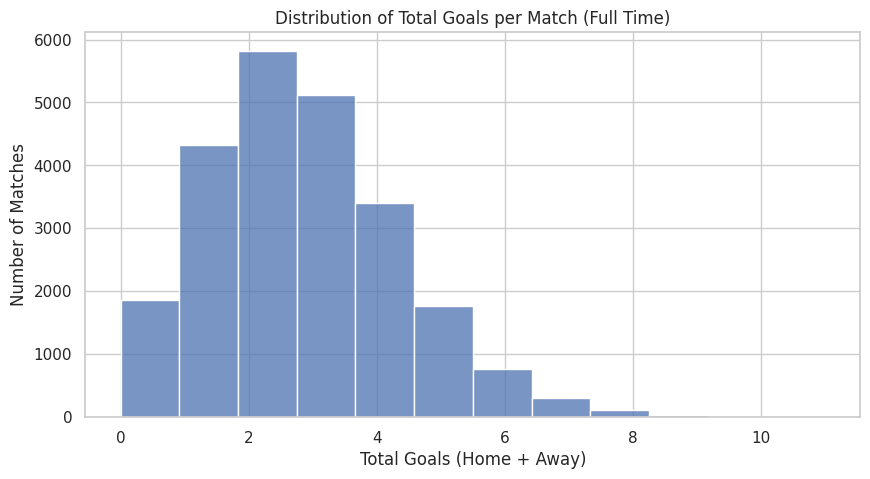

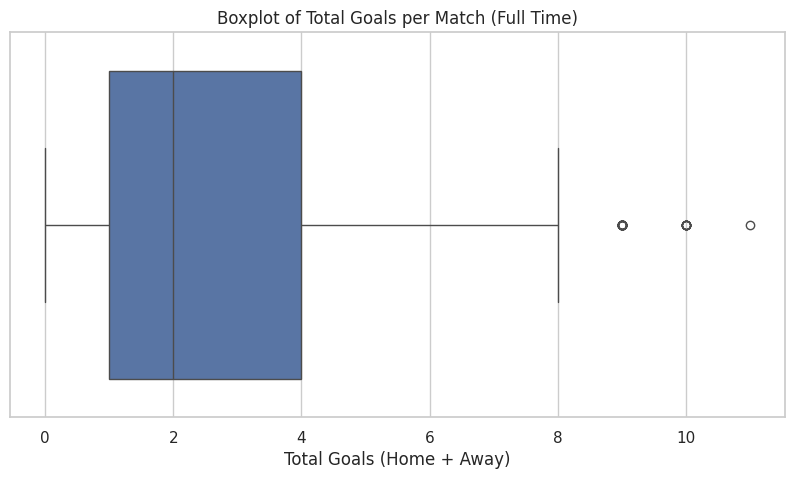

In [10]:
# Insight 1 (r1): Distribution of total goals per match (FT_TotalGoals)

# 1) Quick frequency table (helps you write the insight sentence)
goal_counts = df["FT_TotalGoals"].value_counts().sort_index()
goal_percent = (goal_counts / len(df) * 100).round(2)

display(pd.DataFrame({
    "Matches": goal_counts,
    "Percent (%)": goal_percent
}))

# 2) Summary stats
display(df["FT_TotalGoals"].describe())

# 3) Histogram
plt.figure()
sns.histplot(df["FT_TotalGoals"], bins=12, kde=False)
plt.title("Distribution of Total Goals per Match (Full Time)")
plt.xlabel("Total Goals (Home + Away)")
plt.ylabel("Number of Matches")
plt.show()

# 4) Boxplot
plt.figure()
sns.boxplot(x=df["FT_TotalGoals"])
plt.title("Boxplot of Total Goals per Match (Full Time)")
plt.xlabel("Total Goals (Home + Away)")
plt.show()

### Insight 2 (r2) — Home wins are the most common full-time outcome

**Insight (one sentence):** Across all matches, **home wins are the most frequent result (44.63%)**, while **away wins (28.85%)** and **draws (26.52%)** are less common.

**Evidence:**  
- The count table shows:
  - **H (Home win): 10,489 matches (44.63%)**
  - **A (Away win): 6,782 matches (28.85%)**
  - **D (Draw): 6,233 matches (26.52%)**
- The countplot visually confirms that the **H bar is clearly the highest**.

**Interpretation:** This suggests a clear home advantage effect overall: playing at home is associated with a higher probability of winning compared to playing away, across both leagues combined.

,Matches,Percent (%)
FT Result,,
H,10489,44.63
A,6782,28.85
D,6233,26.52


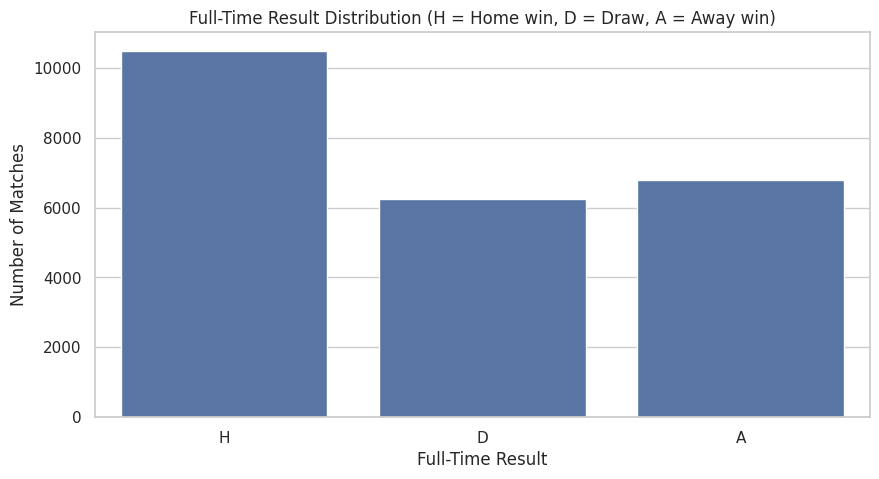

In [11]:
# Insight 2 (r2): Distribution of match outcomes (FT Result)

result_counts = df["FT Result"].value_counts()
result_percent = (result_counts / len(df) * 100).round(2)

display(pd.DataFrame({
    "Matches": result_counts,
    "Percent (%)": result_percent
}))

plt.figure()
sns.countplot(data=df, x="FT Result", order=["H", "D", "A"])
plt.title("Full-Time Result Distribution (H = Home win, D = Draw, A = Away win)")
plt.xlabel("Full-Time Result")
plt.ylabel("Number of Matches")
plt.show()

### Insight 3 (r3) — Result distributions are similar across leagues, with slightly more home wins in the EPL

**Insight (one sentence):** The EPL and Championship have very similar full-time result distributions, but the **EPL shows a slightly higher home-win rate** and a slightly lower draw rate.

**Evidence:**  
- **EPL:** H = **45.77%**, D = **25.57%**, A = **28.65%**  
- **Championship:** H = **43.40%**, D = **27.53%**, A = **29.07%**  
- The grouped countplot and percentage bar chart show that the overall pattern is consistent in both leagues (home wins most common), with small differences in proportions.

**Interpretation:** Home advantage exists in both leagues, but it appears **marginally stronger in the EPL** (about +2.4 percentage points in home wins). The Championship has **slightly more draws**, which may suggest closer matches or lower separation between teams on average.

FT Result,A,D,H
League,,,
Championship,3300,3125,4926
EPL,3482,3108,5563


FT Result,A,D,H
League,,,
Championship,29.07,27.53,43.40
EPL,28.65,25.57,45.77


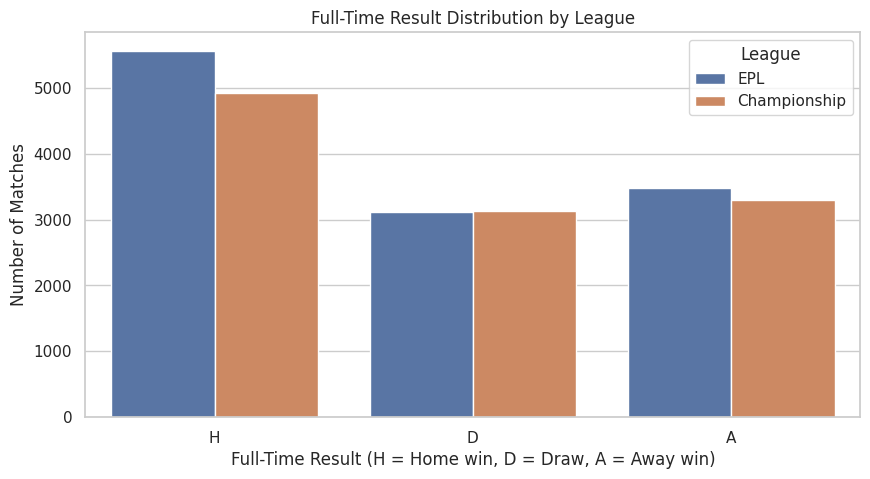

<Figure size 1000x500 with 0 Axes>

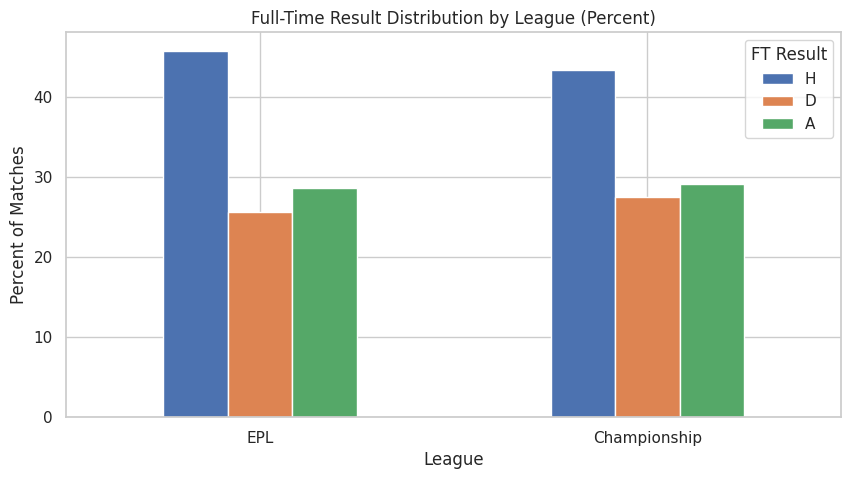

In [12]:
# Insight 3 (r3): Result distribution grouped by League (EPL vs Championship)

# 1) Counts table (evidence)
counts = pd.crosstab(df["League"], df["FT Result"])
percent = counts.div(counts.sum(axis=1), axis=0) * 100

display(counts)
display(percent.round(2))

# 2) Grouped countplot
plt.figure()
sns.countplot(data=df, x="FT Result", hue="League", order=["H", "D", "A"])
plt.title("Full-Time Result Distribution by League")
plt.xlabel("Full-Time Result (H = Home win, D = Draw, A = Away win)")
plt.ylabel("Number of Matches")
plt.show()

# 3) Grouped percentage bar chart (often easier to interpret than raw counts)
percent_plot = percent.loc[["EPL", "Championship"], ["H", "D", "A"]]

plt.figure()
percent_plot.plot(kind="bar")
plt.title("Full-Time Result Distribution by League (Percent)")
plt.xlabel("League")
plt.ylabel("Percent of Matches")
plt.xticks(rotation=0)
plt.legend(title="FT Result")
plt.show()

### Insight 4 (r4) — EPL matches are slightly higher-scoring than Championship matches

**Insight (one sentence):** On average, **EPL matches have slightly more total goals** than Championship matches.

**Evidence:**  
From the per-league summary statistics:
- **EPL:** mean = **2.69** goals, median (50%) = **3**, IQR = **1 to 4**, max = **11**
- **Championship:** mean = **2.55** goals, median (50%) = **2**, IQR = **1 to 4**, max = **10**

The boxplot and violin plot show that both leagues have very similar spreads, but the EPL’s center is shifted a bit higher (higher median and mean).

**Interpretation:** While both leagues mostly fall in the same typical range (around 1–4 total goals), the EPL appears **slightly more goal-heavy overall**, which could reflect stronger attacking quality or higher variance in matchups.

,count,mean,std,min,25%,50%,75%,max
League,,,,,,,,
Championship,11351.0,2.55,1.58,0.0,1.0,2.0,4.0,10.0
EPL,12153.0,2.69,1.69,0.0,1.0,3.0,4.0,11.0


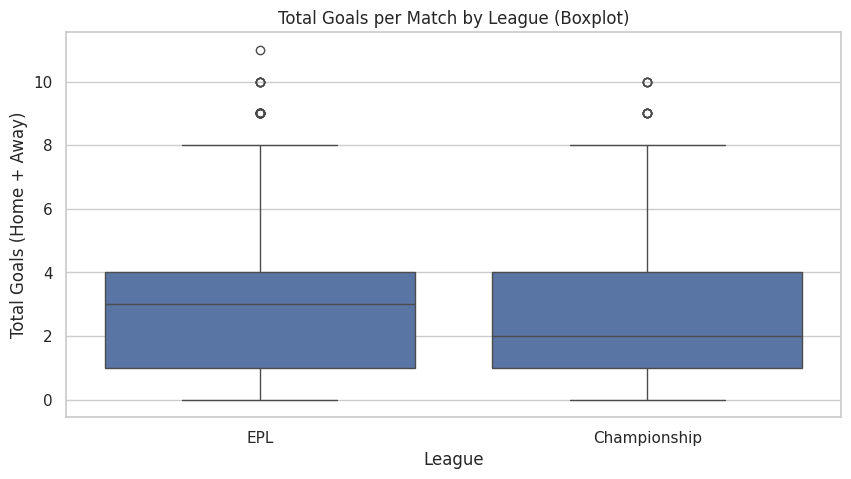

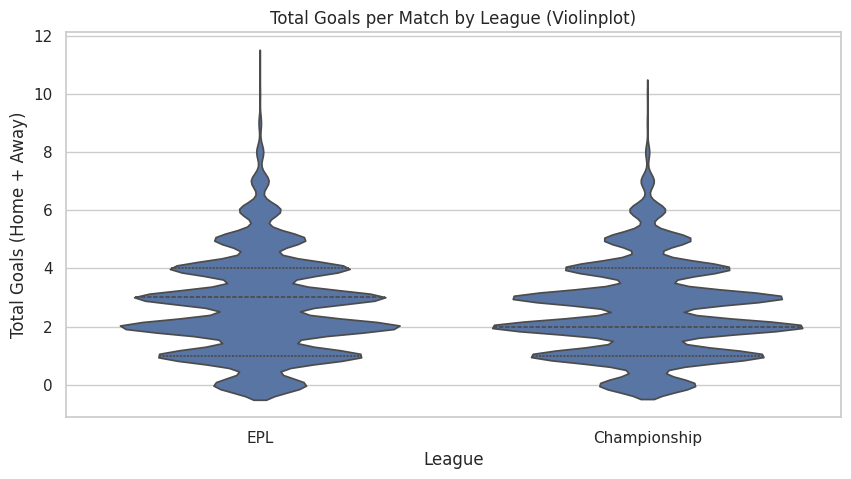

In [13]:
# Insight 4 (r4): Compare FT_TotalGoals distribution by League

# 1) Summary table per league (evidence)
league_goal_stats = df.groupby("League")["FT_TotalGoals"].describe().round(2)
display(league_goal_stats)

# 2) Boxplot (main evidence)
plt.figure()
sns.boxplot(data=df, x="League", y="FT_TotalGoals", order=["EPL", "Championship"])
plt.title("Total Goals per Match by League (Boxplot)")
plt.xlabel("League")
plt.ylabel("Total Goals (Home + Away)")
plt.show()

# 3) Optional: violinplot (more detailed shape)
plt.figure()
sns.violinplot(data=df, x="League", y="FT_TotalGoals", order=["EPL", "Championship"], inner="quartile")
plt.title("Total Goals per Match by League (Violinplot)")
plt.xlabel("League")
plt.ylabel("Total Goals (Home + Away)")
plt.show()

### Insight 5 (r5) — Home win rate is slightly higher in the EPL than in the Championship

**Insight (one sentence):** The **home-win rate is slightly higher in the EPL (45.77%)** than in the Championship (43.40%).

**Evidence:**  
From the 2×2 contingency table and row percentages:
- **EPL:** HomeWin = Yes **45.77%**, No **54.23%**
- **Championship:** HomeWin = Yes **43.40%**, No **56.60%**

The bar chart of home-win rate by league visually confirms this small difference.

**Interpretation:** Home advantage exists in both leagues, but the EPL shows a **modestly higher** probability of a home win (about +2.37 percentage points). Most matches still end as “not a home win” (draw or away win) in both leagues.

HomeWin,No,Yes
League,,
Championship,6425,4926
EPL,6590,5563


HomeWin,No,Yes
League,,
Championship,56.60,43.40
EPL,54.23,45.77


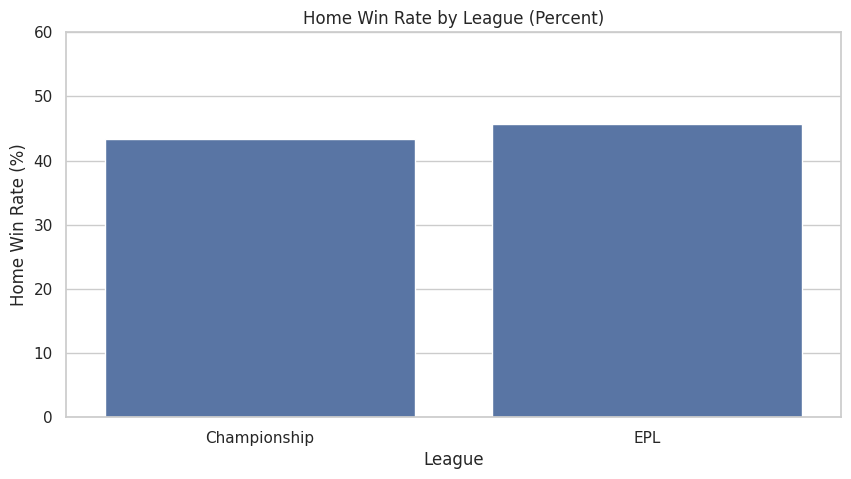

In [14]:
# Insight 5 (r5): HomeWin (Yes/No) vs League (EPL/Championship)

# 1) Counts + row percentages (best evidence)
counts = pd.crosstab(df["League"], df["HomeWin"])
percent = counts.div(counts.sum(axis=1), axis=0) * 100

display(counts)
display(percent.round(2))

# 2) Plot: percent home wins by league (cleanest for 2x2)
plt.figure()
sns.barplot(
    x=percent.index,
    y=percent["Yes"].values
)
plt.title("Home Win Rate by League (Percent)")
plt.xlabel("League")
plt.ylabel("Home Win Rate (%)")
plt.ylim(0, 60)
plt.show()

### Insight 6 (r6) — As total goals increase, home wins become more likely and draws become less common

**Insight (one sentence):** Matches with higher total goals are **more likely to end in a home win**, while **draws become less frequent** as the goal total increases.

**Evidence:**  
From the result distribution within each GoalBin:
- **0–1 goals:** H = **40.04%**, D = **30.06%**, A = **29.90%**
- **2–3 goals:** H = **45.09%**, D = **26.32%**, A = **28.59%**
- **4–5 goals:** H = **47.24%**, D = **23.90%**, A = **28.86%**
- **6+ goals:** H = **52.63%**, D = **21.43%**, A = **25.94%**

The stacked percent bar chart shows the same trend: the **home-win segment grows** from low-scoring to high-scoring games, and the **draw segment shrinks**.

**Interpretation:** Draws are most common when matches have very few goals (especially 0–1 total goals). In contrast, high-scoring matches are less likely to end level, and they more often result in a decisive outcome—particularly a home win.

FT Result,A,D,H
GoalBin,,,
0-1,1847,1857,2473
2-3,3129,2881,4936
4-5,1490,1234,2439
6+,316,261,641


FT Result,A,D,H
GoalBin,,,
0-1,29.90,30.06,40.04
2-3,28.59,26.32,45.09
4-5,28.86,23.90,47.24
6+,25.94,21.43,52.63


<Figure size 1000x500 with 0 Axes>

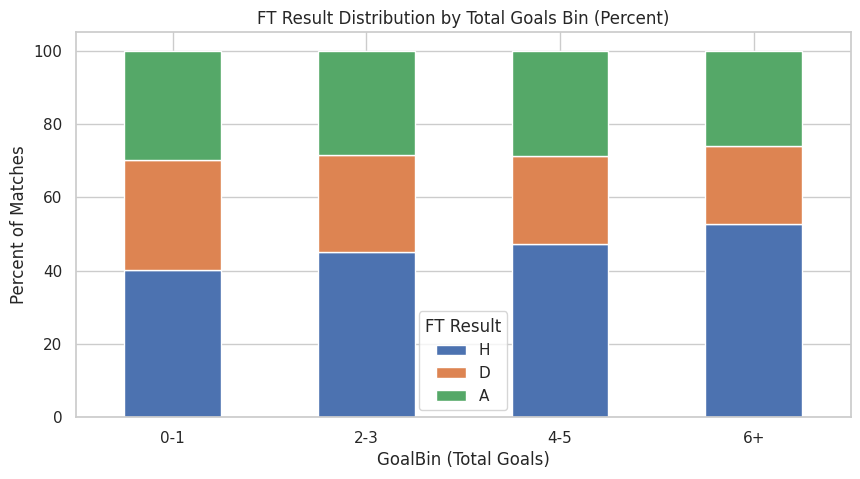

In [15]:
# Insight 6 (r6): FT Result (H/D/A) vs GoalBin (0–1, 2–3, 4–5, 6+)

# 1) Counts + row percentages (evidence)
counts = pd.crosstab(df["GoalBin"], df["FT Result"])
percent = counts.div(counts.sum(axis=1), axis=0) * 100

display(counts)
display(percent.round(2))

# 2) Stacked bar chart (percent) - easiest to interpret
percent = percent.loc[["0-1", "2-3", "4-5", "6+"], ["H", "D", "A"]]

plt.figure()
percent.plot(kind="bar", stacked=True)
plt.title("FT Result Distribution by Total Goals Bin (Percent)")
plt.xlabel("GoalBin (Total Goals)")
plt.ylabel("Percent of Matches")
plt.xticks(rotation=0)
plt.legend(title="FT Result")
plt.show()

### Insight 7 (r7) — EPL has a slightly higher share of high-scoring matches than the Championship

**Insight (one sentence):** Compared to the Championship, the EPL has **fewer very low-scoring matches (0–1 goals)** and **more high-scoring matches (4–5 and 6+ goals)**.

**Evidence:**  
Within each league, the GoalBin distribution is:
- **Championship:** 0–1 = **27.05%**, 2–3 = **47.85%**, 4–5 = **20.69%**, 6+ = **4.40%**
- **EPL:** 0–1 = **25.56%**, 2–3 = **45.37%**, 4–5 = **23.15%**, 6+ = **5.92%**

The grouped percent bar chart confirms that EPL bars are higher for **4–5** and **6+**, while the Championship is higher for **0–1** and **2–3**.

**Interpretation:** Both leagues are dominated by 2–3 goal matches, but the EPL shows a small shift toward more goal-heavy games. This aligns with the earlier observation that the EPL has a slightly higher average total-goals rate.

GoalBin,0-1,2-3,4-5,6+
League,,,,
Championship,3071,5432,2349,499
EPL,3106,5514,2814,719


GoalBin,0-1,2-3,4-5,6+
League,,,,
Championship,27.05,47.85,20.69,4.40
EPL,25.56,45.37,23.15,5.92


<Figure size 1000x500 with 0 Axes>

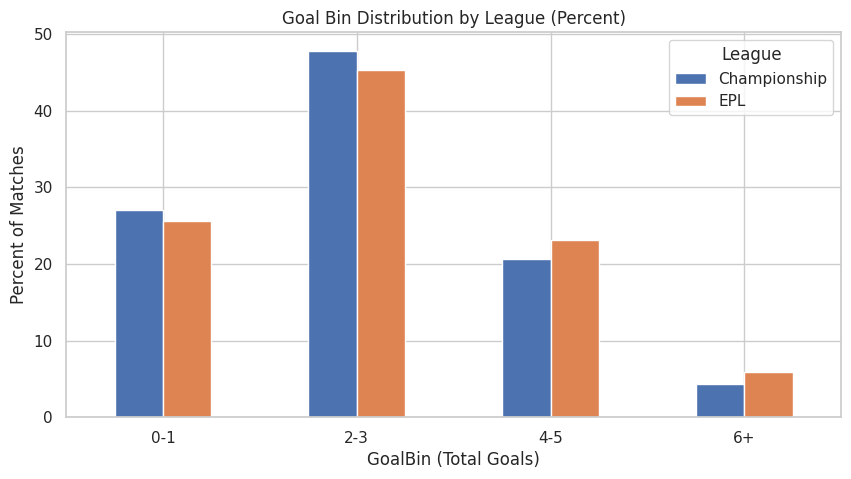

In [16]:
# Insight 7 (r7): GoalBin (binned numeric) vs League

# 1) Counts and within-league percentages
counts = pd.crosstab(df["League"], df["GoalBin"])
percent = counts.div(counts.sum(axis=1), axis=0) * 100

# keep bin order
percent = percent[["0-1", "2-3", "4-5", "6+"]]

display(counts)
display(percent.round(2))

# 2) Plot: grouped bar chart of percentages
plt.figure()
percent.T.plot(kind="bar")
plt.title("Goal Bin Distribution by League (Percent)")
plt.xlabel("GoalBin (Total Goals)")
plt.ylabel("Percent of Matches")
plt.xticks(rotation=0)
plt.legend(title="League")
plt.show()

### Insight 8 (r8) — More shots are associated with more goals, but the relationship is only weak-to-moderate

**Insight (one sentence):** Matches where the home team takes more shots tend to have more home goals, but the relationship is not very strong (**correlation = 0.256**).

**Evidence:**  
- After filtering to matches with recorded shot data, I used **20,679 matches** (out of 23,504).  
- The scatterplot shows a general upward trend: higher `H Shots` values are associated with higher `FTH Goals`, but with large spread.
- The regression line has a positive slope, and the Pearson correlation between `H Shots` and `FTH Goals` is **0.256**.

**Interpretation:** Shots reflect attacking pressure, but they do not directly translate into goals—finishing efficiency and shot quality vary a lot. This is why the trend is positive, yet the points remain widely scattered.

Rows used (non-missing H Shots): 20679 out of 23504
Correlation between H Shots and FTH Goals: 0.256


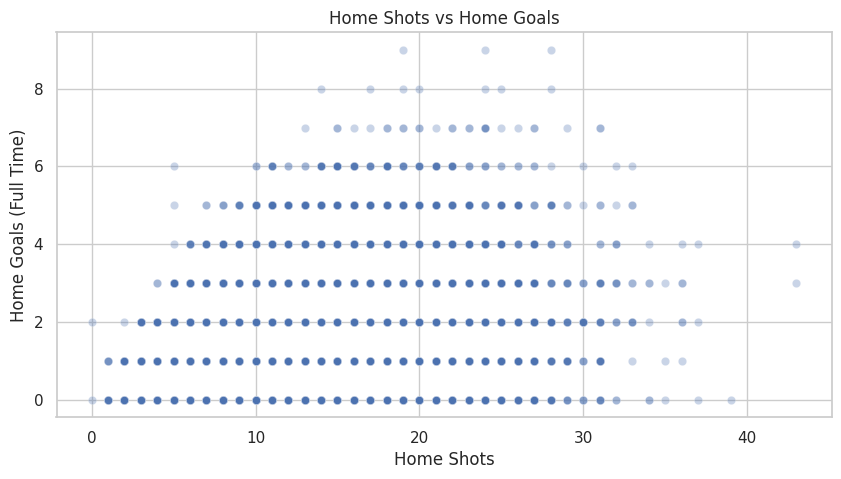

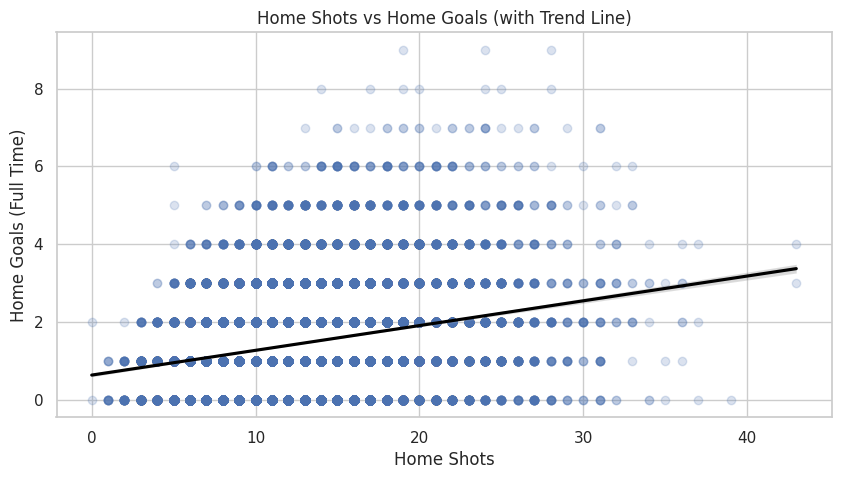

In [17]:
# Insight 8 (r8): H Shots vs FTH Goals (numeric vs numeric)

tmp = df.dropna(subset=["H Shots", "FTH Goals"]).copy()

print("Rows used (non-missing H Shots):", len(tmp), "out of", len(df))

# Correlation (simple numeric summary)
corr = tmp["H Shots"].corr(tmp["FTH Goals"])
print("Correlation between H Shots and FTH Goals:", round(corr, 3))

# Scatterplot
plt.figure()
sns.scatterplot(data=tmp, x="H Shots", y="FTH Goals", alpha=0.3)
plt.title("Home Shots vs Home Goals")
plt.xlabel("Home Shots")
plt.ylabel("Home Goals (Full Time)")
plt.show()

# Optional: add a trend line (regression)
plt.figure()
sns.regplot(data=tmp, x="H Shots", y="FTH Goals", scatter_kws={"alpha":0.2}, line_kws={"color":"black"})
plt.title("Home Shots vs Home Goals (with Trend Line)")
plt.xlabel("Home Shots")
plt.ylabel("Home Goals (Full Time)")
plt.show()

### Insight 9 (extra) — EPL goal averages rise in recent seasons, while the Championship stays flatter

**Insight (one sentence):** Over time, the EPL’s average total goals per match shows a **noticeable increase in recent seasons**, while the Championship trend is **more stable and slightly lower overall**.

**Evidence:**  
- The line plot shows the EPL curve generally above the Championship curve and rising more strongly in the most recent seasons.
- From the season averages shown:
  - **EPL 2023:** ~**3.28** average total goals (a clear spike)
  - **EPL 2024:** ~**2.98**
  - **Championship 2024:** ~**2.48**
- Earlier EPL seasons (e.g., 1993–1995) are around **~2.59–2.60**, which is lower than the recent peak years.

**Interpretation:** The EPL appears to have become more goal-heavy in the latest seasons, while the Championship stays closer to the mid-2 goal range. This supports my earlier findings that EPL matches are slightly higher-scoring overall.

,League,SeasonStart,FT_TotalGoals
21,EPL,1993,2.586580
22,EPL,1994,2.586580
23,EPL,1995,2.600000
24,EPL,1996,2.552632
25,EPL,1997,2.681579


,League,SeasonStart,FT_TotalGoals
50,EPL,2022,2.852632
19,Championship,2023,2.681159
51,EPL,2023,3.278947
20,Championship,2024,2.482315
52,EPL,2024,2.980861


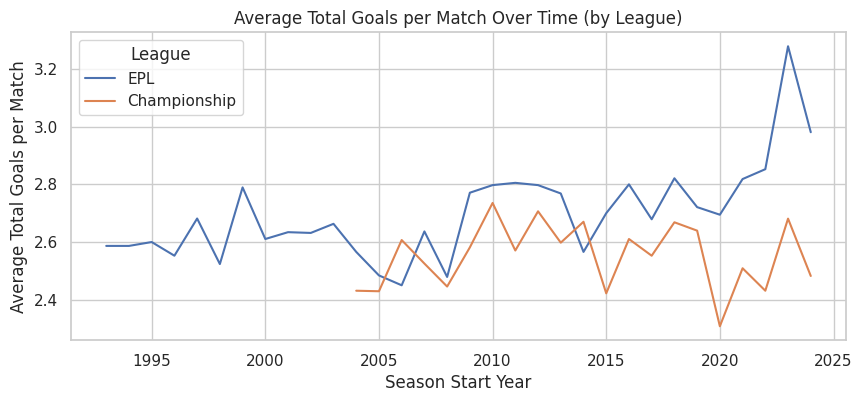

In [18]:
# Insight 9 (extra): Trend of average goals per match over seasons (by league)

trend_goals = (
    df.groupby(["League", "SeasonStart"])["FT_TotalGoals"]
      .mean()
      .reset_index()
      .sort_values("SeasonStart")
)

display(trend_goals.head())
display(trend_goals.tail())

plt.figure(figsize=(10,4))
sns.lineplot(data=trend_goals, x="SeasonStart", y="FT_TotalGoals", hue="League")
plt.title("Average Total Goals per Match Over Time (by League)")
plt.xlabel("Season Start Year")
plt.ylabel("Average Total Goals per Match")
plt.show()

### Insight 10 (extra) — Home win rates fluctuate over time; EPL is usually slightly higher but not always

**Insight (one sentence):** Home win rate varies from season to season, and while the EPL is often slightly higher than the Championship, there are years where the gap narrows or even reverses.

**Evidence:**  
- The line chart shows both leagues’ home-win rates fluctuating rather than following a smooth upward or downward trend.
- Example values from the output:
  - **EPL 1995:** ~**48.95%**
  - **EPL 2022:** ~**48.42%**
  - **EPL 2024:** ~**39.71%** (a noticeable drop compared to recent seasons)
  - **Championship 2024:** ~**45.34%**
- In the most recent seasons shown:
  - **EPL 2023:** ~**46.05%**
  - **Championship 2024:** ~**45.34%**

**Interpretation:** Home advantage is present overall, but it is not constant across time. Year-to-year variation could reflect changes in tactics, team balance, or other season-specific factors. The 2024 EPL drop suggests that recent home advantage may have weakened in that season compared to earlier years.

,League,SeasonStart,HomeWinFlag,HomeWinRatePercent
21,EPL,1993,0.415584,41.558442
22,EPL,1994,0.443723,44.372294
23,EPL,1995,0.489474,48.947368
24,EPL,1996,0.426316,42.631579
25,EPL,1997,0.484211,48.421053


,League,SeasonStart,HomeWinFlag,HomeWinRatePercent
50,EPL,2022,0.484211,48.421053
19,Championship,2023,0.445652,44.565217
51,EPL,2023,0.460526,46.052632
20,Championship,2024,0.453376,45.337621
52,EPL,2024,0.397129,39.712919


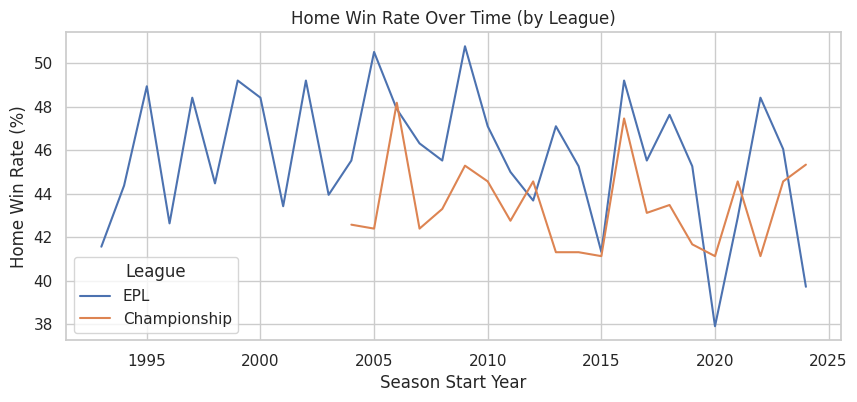

In [19]:
# Insight 10 (extra): Trend of home win rate over seasons (by league)

homewin_trend = (
    df.assign(HomeWinFlag=(df["HomeWin"] == "Yes").astype(int))
      .groupby(["League", "SeasonStart"])["HomeWinFlag"]
      .mean()
      .reset_index()
      .sort_values("SeasonStart")
)

homewin_trend["HomeWinRatePercent"] = homewin_trend["HomeWinFlag"] * 100

display(homewin_trend.head())
display(homewin_trend.tail())

plt.figure(figsize=(10,4))
sns.lineplot(data=homewin_trend, x="SeasonStart", y="HomeWinRatePercent", hue="League")
plt.title("Home Win Rate Over Time (by League)")
plt.xlabel("Season Start Year")
plt.ylabel("Home Win Rate (%)")
plt.show()

## Conclusion (Summary of Key Findings)

In this EDA, I explored match-level data from the English Premier League (EPL) and the Championship and produced 10 evidence-based insights using summary tables and visualizations.

### Main takeaways
- **Scoring is usually moderate:** Most matches finish with **2–3 total goals**, while very high-scoring games are rare.
- **Home advantage appears consistently:** Home wins are the most common outcome overall, and the EPL shows a slightly higher home-win rate than the Championship.
- **EPL vs Championship differences are subtle but consistent:** The EPL has a slightly higher average number of goals per match and a slightly larger share of higher-scoring matches (4–5 and 6+ goals).
- **Goal totals relate to outcomes:** As total goals increase, matches become less likely to end in a draw, and home wins become more likely.
- **Shots relate to goals, but not strongly:** Home shots are positively associated with home goals, but the correlation is only **weak-to-moderate**, indicating that finishing efficiency varies.
- **Trends over time:** EPL average goals per match rises notably in the most recent seasons in this dataset, while home-win rates fluctuate over time rather than following a smooth trend.

Overall, the EPL and Championship look broadly similar in their outcome structure, but the EPL is slightly more goal-heavy and slightly more home-win oriented.

## Data Quality Notes & Limitations

### Missing values
Some match statistics are missing, especially in older seasons:
- `Referee` has ~14% missing values.
- Many match-stat columns (shots, shots on target, fouls, corners, cards) have ~12% missing values.
- Half-time fields (HT goals/result) have ~4% missing values.

**How I handled this:**  
- I did **not** impute these values because many are missing in structured blocks (likely certain seasons) and imputation could introduce bias.
- For analyses that require shot data (Insight 8), I used **only the subset of matches with non-missing shot values** and reported how many rows were used.

### Interpretation limits
- This analysis is **descriptive**, not causal: patterns (e.g., more shots → more goals) do not prove cause-and-effect.
- Differences between leagues are often **small** (a few percentage points), so conclusions should be treated as “slight differences” rather than major separations.

## Reproducibility & Dataset Source

To ensure the notebook can be run end-to-end without manual downloads, I loaded the data from public GitHub raw links:

- EPL data: https://raw.githubusercontent.com/idxwze/CSI4142-A1-data/main/England%20CSV.csv  
- Championship data: https://raw.githubusercontent.com/idxwze/CSI4142-A1-data/main/England%202%20CSV.csv  

These CSVs were originally based on a Kaggle dataset:
`panaaaaa/english-premier-league-and-championship-full-dataset` (accessed via Kaggle).

## References

### Dataset sources
- Kaggle dataset page: `panaaaaa/english-premier-league-and-championship-full-dataset` (original source).
- Public CSV links used to load the data in this notebook (for reproducibility):
  - EPL: https://raw.githubusercontent.com/idxwze/CSI4142-A1-data/main/England%20CSV.csv  
  - Championship: https://raw.githubusercontent.com/idxwze/CSI4142-A1-data/main/England%202%20CSV.csv  

### Tools and documentation consulted
- **pandas documentation** (DataFrames, `read_csv`, `groupby`, `crosstab`, missing values handling): https://pandas.pydata.org/docs/
- **NumPy documentation** (`np.where`, numeric operations): https://numpy.org/doc/
- **Seaborn documentation** (EDA plots such as `histplot`, `countplot`, `boxplot`, `violinplot`, `scatterplot`, `regplot`, `lineplot`): https://seaborn.pydata.org/
- **Matplotlib documentation** (plot formatting and display): https://matplotlib.org/stable/
- Course material and assignment guidelines for CSI4142 (Winter 2026).